In [95]:
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk

from pairwise_conv_1d import PairwiseConv1D
from nearest_neighbor_conv_1d import NearestNeighborConv1D

import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 
sns.set()
%matplotlib inline

In [92]:
L, A = 50, 4
kwargs = {'filters':32, 'kernel_size':19, 
          'kernel_regularizer':tfk.regularizers.l2(1e-6), 
          'padding':'same'}
conv1 = tfk.layers.Conv1D(**kwargs)

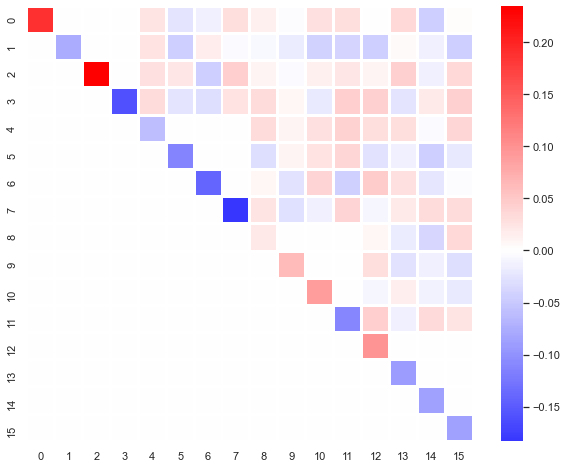

In [93]:
conv2 = PairwiseConv1D(**kwargs)
conv2.build((L, A))
diag = tf.transpose(conv2.diag_kernel, [1, 0])
diag = tf.linalg.diag(diag)
offdiag = conv2._get_offdiag_kernel()
w1 = diag[0].numpy()
w2 = offdiag[0].numpy()
w = w1+w2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.heatmap(w[:16, :16], 
            cbar=True, 
            cmap=mpl.cm.bwr, 
            ax=ax,
            linewidth=2,
            center=0)

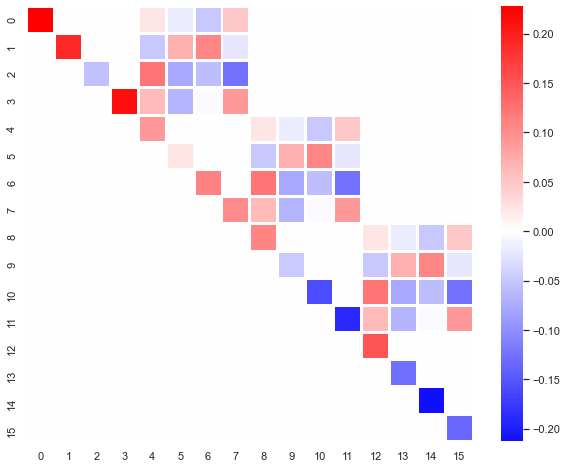

In [94]:
conv3 = NearestNeighborConv1D(**kwargs)
conv3.build((L, A))
diag = tf.transpose(conv3.diag_kernel, [1, 0])
diag = tf.linalg.diag(diag)
offdiag = conv3._get_offdiag_kernel()
w1 = diag[0].numpy()
w2 = offdiag[0].numpy()
w = w1+w2
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
sns.heatmap(w[:16, :16], 
            cbar=True, 
            cmap=mpl.cm.bwr, 
            ax=ax,
            linewidth=2,
            center=0)